# Creating dataset

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import timeit
from sklearn import datasets
from sklearn.decomposition import PCA

def data_set():
    #Set three centres     
    center_1 = ([2,6])
    center_2 = ([7,1])
    center_3 = ([1,2])
    
    #Gerenate random data around those centres
    cluster_1 = np.random.randn(250, 2) + center_1
    cluster_2 = np.random.randn(250, 2) + center_2
    cluster_3 = np.random.randn(250, 2) + center_3
    
    clusters = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
    return clusters

# Creating algorithm

In [35]:
def kmeans(clusters, K, iterations):
    # Number of training data
    n = clusters.shape[0]
    
    # Number of features in the data
    c = clusters.shape[1]
    
    # Generate random centers
    mean = np.mean(clusters, axis = 0)
    std = np.std(clusters, axis = 0)
    centers = np.random.randn(K,c)*std + mean
    
    distance = np.zeros((n,K))
    clust_ind = np.zeros(n)
    WCSS = np.zeros(K)
   

    plt.scatter(clusters[:,0], clusters[:,1], c = 'pink')
    plt.scatter(centers[:,0], centers[:,1], marker='*', s=150)
    plt.show()

    for iter_count in range(iterations):
        
        # Measure the distance to every center
        for i in range(K):
            distance[:,i] = np.sqrt(np.sum((clusters - centers[i])**2, axis = 1))
        clust_ind = np.argmin(distance, axis = 1)
        
        #Update centers
        for i in range(K):
            centers[i] = np.mean(clusters[clust_ind == i], axis = 0)

    fig, axes = plt.subplots(1)
    for ind in range(K):
        axes.scatter(clusters[clust_ind==ind,0], clusters[clust_ind == ind, 1])
        axes.scatter(centers[:,0], centers[:,1], marker='*', c = 'black', s=250)
    plt.show()
    
    for j in range(K):
        WCSS[j] = np.sum(distance[clust_ind==j, j])

    return WCSS

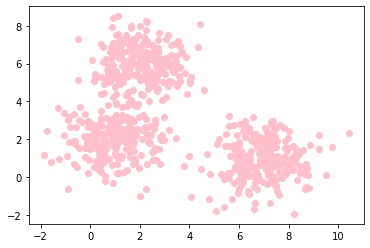

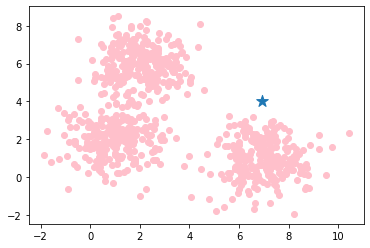

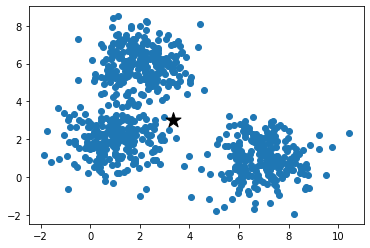

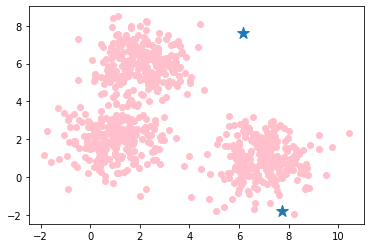

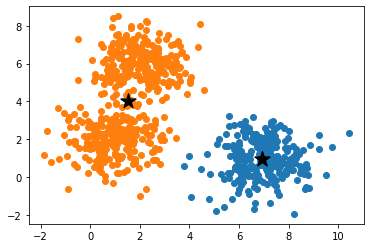

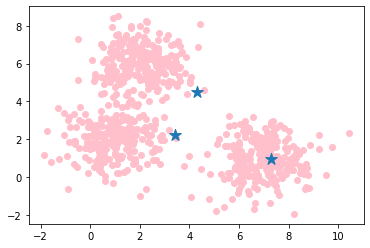

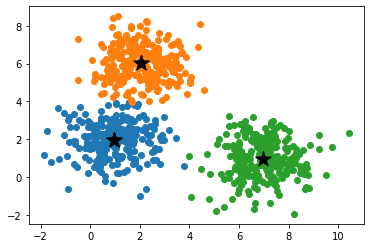

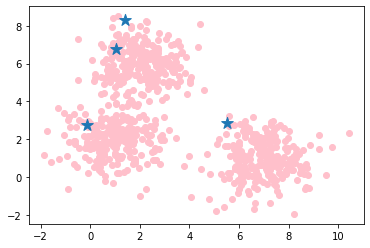

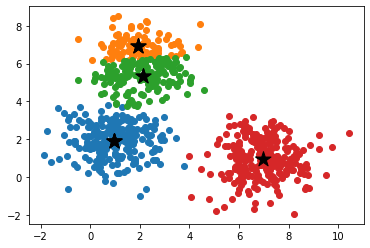

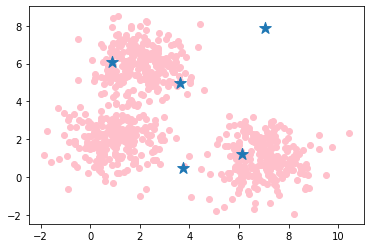

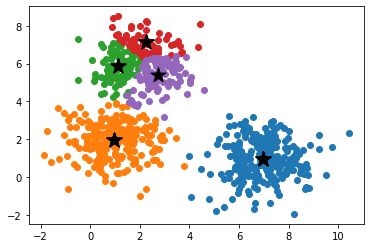

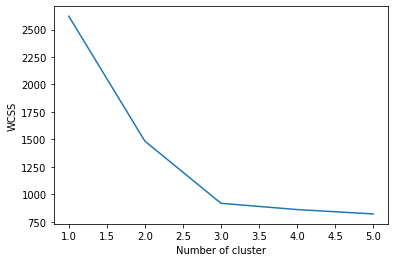

In [36]:
def main():
    K = 5
    i = 1;
    x = np.array([1,2,3,4,5])
    iterations = 5
    clusters = data_set()

    n = clusters.shape[0]
    y = np.zeros(K)
    WCSS = np.zeros(K)

    plt.scatter(clusters[:,0], clusters[:,1], c = 'pink')
    plt.show()
    while i<=K:
        y = kmeans(clusters, i , iterations)
        WCSS[i-1] = np.sum(y)
        i = i+1 
    fig, axes = plt.subplots(1)
    axes.yaxis.set_label_position('left')
    axes.set_ylabel(u'WCSS')
    axes.xaxis.set_label_position('bottom')
    axes.set_xlabel(u'Number of cluster')
    axes.plot(x, WCSS)
    plt.show()

if __name__ == '__main__':
    main()